In [2]:
import urllib
query = 'speech recognition'
num_results = 1000
url_link = ('http://export.arxiv.org/api/query?search_query=all:' + query + '&start=0&max_results=' + str(num_results))
with urllib.request.urlopen(url_link) as url:
    data = url.read()

In [3]:
from nltk.corpus import wordnet as wn

def gen_syn(word):
    synonyms = []
    x = (wn.synsets(word))
    for syn in x:
        for l in syn.lemmas():
            synonyms.append(l.name())

    x = set(synonyms)
    return (x)

In [4]:
data = data.decode("utf-8") 
data = data.lower()
data = data.replace('\n',' ')
data = data.replace('$','')
data = data.split('summary>')
syn_list = gen_syn(query)
for syn in syn_list:
    data = data.replace(syn,'')

In [5]:
s = ''
summary = []
for i in range(len(data)):
    data[i] = data[i].replace('<', '')
    data[i] = data[i].replace('>', '')
    data[i] = data[i].replace('/', '')
    data[i] = data[i].replace(query, '')
    if (i % 2 == 1):
        s += data[i] + '\n'
        summary.append(data[i])

In [6]:
# write to file
file = open('papers.txt','w')
_ = file.write(s)

In [7]:
words = open('clean_list2.txt').readlines()

In [8]:
for i in range(len(words)):
    words[i] = words[i].replace('\n','')
    words[i] = ' ' + words[i] + ' '

In [9]:
def count_words(string):       
    counts = {word: 0 for word in words}
    
    for word in counts:
        counts[word] = string.count(word)
    
    return counts

In [10]:
counts = count_words(s)

In [11]:
for word in list(counts):
    if(word == '' or counts[word] == 0):
        counts.pop(word)

In [12]:
counts

{' speech synthesis ': 3,
 ' pattern recognition ': 1,
 ' classifiers ': 1,
 ' k-nearest neighbor ': 1,
 ' support vector machine ': 1,
 ' classification ': 2}

In [14]:
import matplotlib.pyplot as plt
from word_cloud import get_word_cloud
from wordcloud import WordCloud

(-0.5, 399.5, 199.5, -0.5)

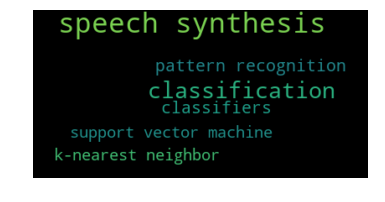

In [15]:
wordcloud = WordCloud().generate_from_frequencies(counts)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")